In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
# Load the dataset
file_path = '/Users/cheryl/Downloads/archive (15)/credit_card_transactions-ibm_v2.csv'
df = pd.read_csv(file_path)

In [2]:
# Print the first few rows to check column names and data format
print(df.head())

# Print the column names to check for unexpected characters or spaces
print("Column Names: \n", df.columns)

   User  Card  Year  Month  Day   Time   Amount           Use Chip  \
0     0     0  2002      9    1  06:21  $134.09  Swipe Transaction   
1     0     0  2002      9    1  06:42   $38.48  Swipe Transaction   
2     0     0  2002      9    2  06:22  $120.34  Swipe Transaction   
3     0     0  2002      9    2  17:45  $128.95  Swipe Transaction   
4     0     0  2002      9    3  06:23  $104.71  Swipe Transaction   

         Merchant Name  Merchant City Merchant State      Zip   MCC Errors?  \
0  3527213246127876953       La Verne             CA  91750.0  5300     NaN   
1  -727612092139916043  Monterey Park             CA  91754.0  5411     NaN   
2  -727612092139916043  Monterey Park             CA  91754.0  5411     NaN   
3  3414527459579106770  Monterey Park             CA  91754.0  5651     NaN   
4  5817218446178736267       La Verne             CA  91750.0  5912     NaN   

  Is Fraud?  
0        No  
1        No  
2        No  
3        No  
4        No  
Column Names: 
 Inde

In [3]:
# Remove leading/trailing spaces from column names if any
df.columns = df.columns.str.strip()

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Handle missing values for numeric columns using mean imputation
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Handle missing values for categorical columns using mode imputation
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Process 'Time' column to extract 'Hour' and 'Minute' 
if 'Time' in df.columns:
    df['Hour'] = df['Time'].str.split(':').str[0].astype(int)  # Extract hour and convert to integer
    df['Minute'] = df['Time'].str.split(':').str[1].astype(int)  # Extract minute and convert to integer
    df.drop(columns=['Time'], inplace=True)  # Drop the original 'Time' column
# Handle target variable 'Is Fraud?' as numeric (ensure it's in binary form)
df['Is Fraud?'] = df['Is Fraud?'].map({'No': 0, 'Yes': 1})  # Assuming 'No' = 0 and 'Yes' = 1
# Encode categorical variables using LabelEncoder
for col in categorical_cols:
    if col != 'Is Fraud?' and col != 'Time':  # Exclude 'Time' from encoding
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [4]:
# Feature and target separation
X = df.drop('Is Fraud?', axis=1)  # All columns except 'Is Fraud?' (target variable)
y = df['Is Fraud?']  # Target variable: 'Is Fraud?'
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions and evaluations for Logistic Regression
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Performance:\n")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_logreg))

Logistic Regression Performance:

[[4871336       0]
 [   6044       0]]


/Users/cheryl/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/cheryl/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/cheryl/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4871336
           1       0.00      0.00      0.00      6044

    accuracy                           1.00   4877380
   macro avg       0.50      0.50      0.50   4877380
weighted avg       1.00      1.00      1.00   4877380

ROC AUC Score: 0.5


In [5]:
# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions and evaluations for Decision Tree
y_pred_dt = dt.predict(X_test)
print("Decision Tree Performance:\n")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_dt))

Decision Tree Performance:

[[4869823    1513]
 [   1502    4542]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4871336
           1       0.75      0.75      0.75      6044

    accuracy                           1.00   4877380
   macro avg       0.87      0.88      0.88   4877380
weighted avg       1.00      1.00      1.00   4877380

ROC AUC Score: 0.8755892438334935


In [6]:
# Train Neural Network (Multilayer Perceptron) model
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Predictions and evaluations for Neural Network
y_pred_mlp = mlp.predict(X_test)
print("Neural Network Performance:\n")
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_mlp))

Neural Network Performance:

[[4871101     235]
 [   2778    3266]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4871336
           1       0.93      0.54      0.68      6044

    accuracy                           1.00   4877380
   macro avg       0.97      0.77      0.84   4877380
weighted avg       1.00      1.00      1.00   4877380

ROC AUC Score: 0.7701611870502484


In [7]:
# Train Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # Assuming 1% of the data is fraudulent
y_pred_iso = iso_forest.fit_predict(X_scaled)

# Convert -1 (anomalies) to 1 (fraudulent) and 1 (inliers) to 0 (legitimate)
y_pred_iso = [1 if i == -1 else 0 for i in y_pred_iso]

# Evaluate Isolation Forest
print("Isolation Forest Performance:\n")
print(confusion_matrix(y, y_pred_iso))
print(classification_report(y, y_pred_iso))
print("ROC AUC Score:", roc_auc_score(y, y_pred_iso))

Isolation Forest Performance:

[[24113542   243601]
 [   29489      268]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99  24357143
           1       0.00      0.01      0.00     29757

    accuracy                           0.99  24386900
   macro avg       0.50      0.50      0.50  24386900
weighted avg       1.00      0.99      0.99  24386900

ROC AUC Score: 0.4995025351090269


In [8]:
# Combine model performance for comparison
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Neural Network', 'Isolation Forest'],
    'ROC AUC Score': [
        roc_auc_score(y_test, y_pred_logreg),
        roc_auc_score(y_test, y_pred_dt),
        roc_auc_score(y_test, y_pred_mlp),
        roc_auc_score(y, y_pred_iso)
    ]
}

results_df = pd.DataFrame(results)
print("Model Comparison:")
print(results_df)

Model Comparison:
                 Model  ROC AUC Score
0  Logistic Regression       0.500000
1        Decision Tree       0.875589
2       Neural Network       0.770161
3     Isolation Forest       0.499503


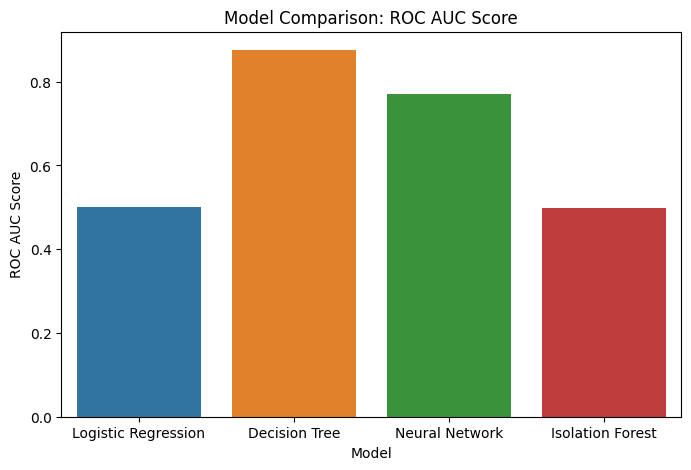

In [9]:
# Plot the comparison of models
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='ROC AUC Score', data=results_df)
plt.title('Model Comparison: ROC AUC Score')
plt.show()

In [10]:
# Evaluate the model with the best ROC AUC Score (e.g., Neural Network or Isolation Forest)
best_model = mlp  # or iso_forest based on the ROC AUC score comparison

# Show confusion matrix and classification report for the best model
y_pred_best = best_model.predict(X_test) if best_model == mlp else y_pred_iso
print("Best Model Performance:\n")
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Best Model Performance:

[[4871101     235]
 [   2778    3266]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4871336
           1       0.93      0.54      0.68      6044

    accuracy                           1.00   4877380
   macro avg       0.97      0.77      0.84   4877380
weighted avg       1.00      1.00      1.00   4877380



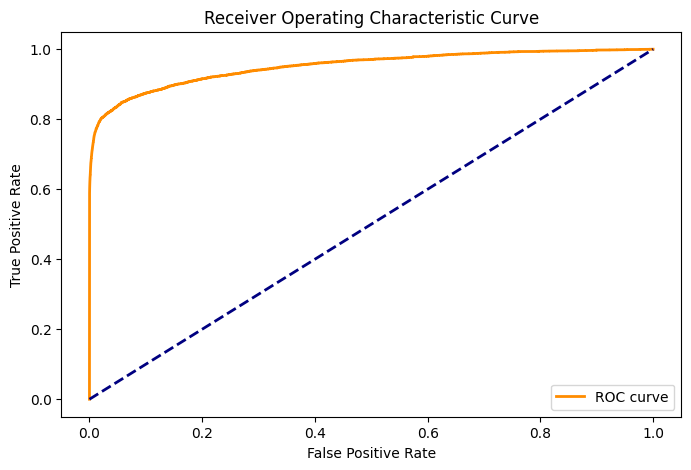

In [11]:
# Display the ROC curve for the best model
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1] if best_model != iso_forest else y_pred_iso)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

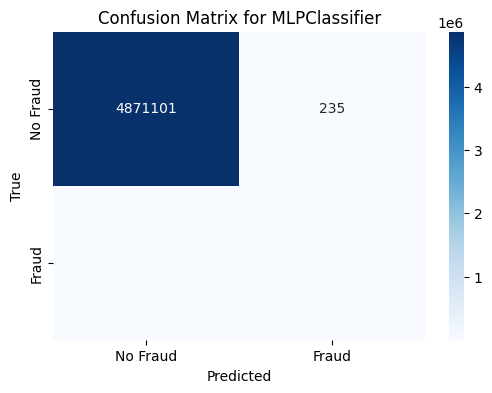

In [12]:
# Confusion matrix heatmap for the best model
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title(f'Confusion Matrix for {best_model.__class__.__name__}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


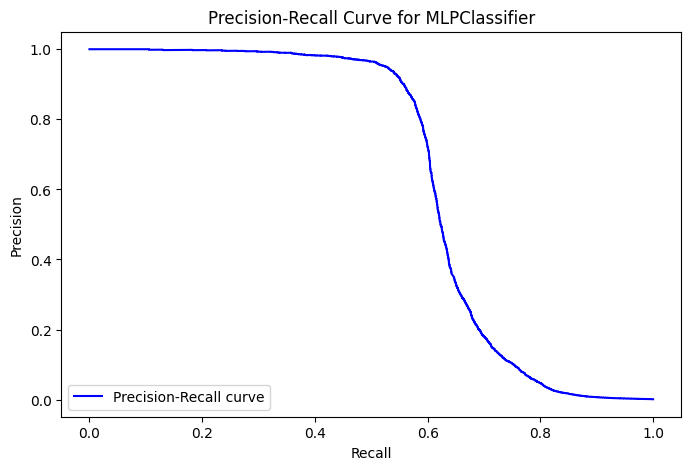

In [13]:

from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, color='b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve for {best_model.__class__.__name__}')
plt.legend(loc='lower left')
plt.show()

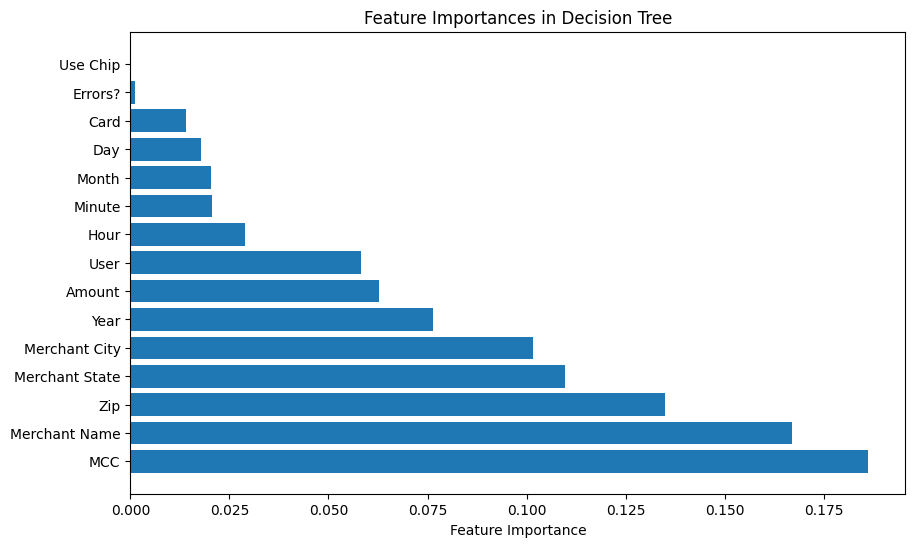

In [14]:
# Feature importance for Decision Tree model
plt.figure(figsize=(10, 6))
feature_importances = dt.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.barh(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), X.columns[indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances in Decision Tree')
plt.show()

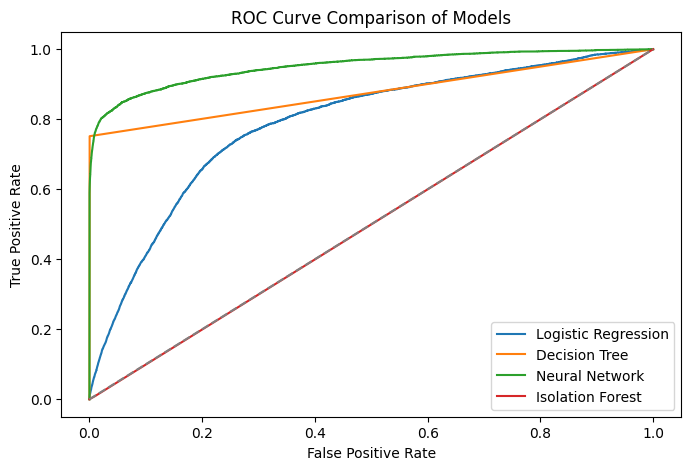

In [15]:
# Plot ROC curve for multiple models
from sklearn.metrics import roc_curve

plt.figure(figsize=(8, 5))

# ROC curve for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression')

# ROC curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')

# ROC curve for Neural Network
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])
plt.plot(fpr_mlp, tpr_mlp, label='Neural Network')

# ROC curve for Isolation Forest
fpr_iso, tpr_iso, _ = roc_curve(y, y_pred_iso)
plt.plot(fpr_iso, tpr_iso, label='Isolation Forest')

# Diagonal line for random model (chance level)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Models')
plt.legend(loc='lower right')
plt.show()

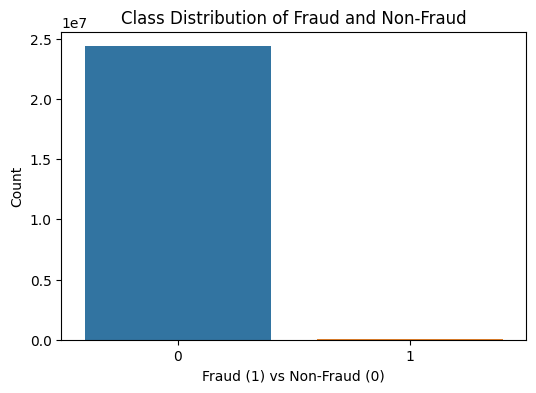

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Is Fraud?', data=df)
plt.title('Class Distribution of Fraud and Non-Fraud')
plt.xlabel('Fraud (1) vs Non-Fraud (0)')
plt.ylabel('Count')
plt.show()